<a href="https://colab.research.google.com/github/Theveetha/Python_Titanic_EDA/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Titanic Data - EDA Case Study***

Data : This data is about the details of passengers traveled in Titanic

To Analyse : To see what all impacted the Survival rate of a passenger who boarded Titanic

## Import Warnings

In [252]:
import warnings
warnings.filterwarnings('ignore')

## Import required libraries

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mount drive

In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import and Read the dataset

In [255]:
# file_path = file_path = r'T:\Learning\LearnBay_DataScience\Statistics and ML\Class17_CaseStudy\Titanic\titanic.csv'
file_path = '/content/drive/MyDrive/Stats_Dataset/titanic.csv'
data = pd.read_csv(file_path)

# To display maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic info on the dataframe

### Data Information

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Number of Rows and Columns

In [257]:
rows, columns = data.shape
print(f"Number of Rows : {rows}\nNumber of Columns : {columns}")

Number of Rows : 891
Number of Columns : 12


### Number of Features

In [258]:
# Using for loop for taking the count of numerical and categorical values
num, obj = 0, 0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num += 1
  else:
    obj += 1

print(f"Number of Numerical columns : {obj}\nNumber of Categorical columns : {num}")

Number of Numerical columns : 5
Number of Categorical columns : 7


### Unique Column details

In [259]:
# Using for loop for the count of columns having single unique values
s_cunique, n_cunique = 0,0
# Categorical Column
for feature in data:
  if data[feature].dtype == 'O':
    if len(data[feature].unique()) == 1:
      s_cunique += 1
    else:
      n_cunique += 1

print("Categorical columns :")
print(f"# of columns having one unique value : {s_cunique} ")
print(f"# of columns having more than one unique value : {n_cunique}")

print()

s_nunique, n_nunique = 0,0
# Numerical Column
for feature in data:
  if data[feature].dtype != 'O':
    if len(data[feature].unique()) == 1:
      s_nunique += 1
    else:
      n_nunique += 1

print("Numerical columns :")
print(f"# of columns having one unique value : {s_nunique} ")
print(f"# of columns having more than one unique value : {n_nunique}")

Categorical columns :
# of columns having one unique value : 0 
# of columns having more than one unique value : 5

Numerical columns :
# of columns having one unique value : 0 
# of columns having more than one unique value : 7


### Column Name and its data type

In [260]:
# List of column names and its data type
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names, 'Data_Type': column_dtypes, 'Unique_Count' : column_unique}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Count
1,PassengerId,int64,891
2,Survived,int64,2
3,Pclass,int64,3
4,Name,object,891
5,Sex,object,2
6,Age,float64,89
7,SibSp,int64,7
8,Parch,int64,7
9,Ticket,object,681
10,Fare,float64,248


### Data Dictionary on Column names

* PassengerId - This column has complete unique values
* Survived - Indicates whether the passenger Survived (1) or not (0)
* Pclass - Indicates the passengers ticket class
  * 1 - First Class
  * 2 - Second Class
  * 3 - Third Class
* Name - Name of the passenger
* Sex - Gender of the passenger (male or female)
* Age - Age of the passenger
* SibSp - Provides the count of Siblings or Spouses aboard to the passenger
* Parch - Provides the count of Parents or Children aboard to the passenger
* Ticket - Ticket number issued to the passenger
* Fare - Fare paid by the passenger for the ticket
* Cabin - Indicates which cabin the passenger belongs to
* Embarked - Place from where the passenger boarder Titanic
  * C - Cherbourg
  * Q - Queenstown
  * S - Southampton

### Observation

* There are no columns with one unique value
* All the values present in the PassengerId is unique - We can remove this column
* Based on the description we can see that Ticket and Name columns is not required for our analysis - We can remove this column

## Data Cleaning

### Data Duplicates

In [261]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


### Null Value Columns

In [262]:
# % of missing values in each columns
mv_gtr_30 = []
mv_lsr_30 = []
n_mv = []
for cols in data:
  if (data[cols].isnull().mean()*100) >= 30:
    mv_gtr_30.append(cols)
  elif 0 < (data[cols].isnull().mean()*100) < 30:
    mv_lsr_30.append(cols)
  else:
    n_mv.append(cols)

print(f"Number of columns having missing value >= 30% : {len(mv_gtr_30)}")
print(f"Number of columns having missing value < 30% : {len(mv_lsr_30)}")
print(f"Number of columns having missing value = 0% : {len(n_mv)}")

Number of columns having missing value >= 30% : 1
Number of columns having missing value < 30% : 2
Number of columns having missing value = 0% : 9


### Observation

* There are no Duplicate records in the given dataframe
* We have one column which has null value greater than 30% (Cabin) - We can remove this column
* We have two columns which has null value less than 30% (Age, Embarked) - We have to fill the null values in these columns
* Column names like Pclass, SibSp, Parch is not self explanatory - We can rename these columns

## Modifications based on our Observation till Data Cleaning

### Removal of few columns

In [263]:
des_removal = ['PassengerId','Name','Ticket']

# Merging the list of columns to remove
from itertools import chain

remove_cols = list(chain(mv_gtr_30,des_removal))

print(f"Total number of columns : {data.shape[1]}")
print(f"Total number of columns to remove : {len(remove_cols)}")

data.drop(columns=remove_cols,inplace=True)

print(f"Total number of columns post cleanup : {data.shape[1]}")

Total number of columns : 12
Total number of columns to remove : 4
Total number of columns post cleanup : 8


### Rename of few columns

In [264]:
data.rename(columns = {'Pclass':'PassengerClass',
                       'SibSp':'Sibling/Spouse',
                       'Parch':'Parents/Children'},inplace=True)

### Dataframe information post Data Cleaning

In [265]:
# List of column names, its data type and its missing percentage
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]
column_mv = [data[name].isnull().mean()*100 for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.000000
2,PassengerClass,int64,3,0.000000
3,Sex,object,2,0.000000
4,Age,float64,89,19.865320
5,Sibling/Spouse,int64,7,0.000000
6,Parents/Children,int64,7,0.000000
7,Fare,float64,248,0.000000
8,Embarked,object,4,0.224467


## Data Transformation

### Derived Metrics

In [266]:
# Here we can categorize the age and store the value in new column

### Data Type Casting

In [267]:
# Looking at the datatypes for the available columns we can see that Age should be an integer. Rather its a float. So have to typecast it to integer

### Missing Value Analysis

In [268]:
# Details to understand numerical column's missing value
data[mv_lsr_30].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [269]:
# Details to understand numerical column's categorical value
for col in data[mv_lsr_30]:
  if data[col].dtype == 'O':
    print(f"Mode of Categorical column - {col} is {data[col].mode()[0]}")

Mode of Categorical column - Embarked is S


### Observation

* Age should be an integer type column. So convert from float to int
* We can see that the mean and median for the Age column is approximately equal so we can replace with either mean or meadian
* For the categorical column we have to replace the missing value with mode, also we see that this particular column has int value. So replace that also with mode
* Also for the values in Embarked we can give proper place name
* Create new column - Age_Category

## Modification based on our Observation till Data Manipulation

### Handling missing value for numerical column

In [270]:
data.fillna(data['Age'].median(),inplace=True)
print(f"Count of Null Value in 'Age' : {data['Age'].isnull().sum()}")

Count of Null Value in 'Age' : 0


### Handling missing value for categorical column

In [271]:
# Handling null value
data.fillna(data['Embarked'].mode(),inplace = True)
print(f"Count of Null Value in 'Embarked' : {data['Embarked'].isnull().sum()}")

# Changing the wrong value
print(f"Unique values of Embarked : {data['Embarked'].unique()}")
data['Embarked'] = data['Embarked'].replace(28.0,data['Embarked'].mode()[0])
print(f"Unique values of Embarked post update : {data['Embarked'].unique()}")

Count of Null Value in 'Embarked' : 0
Unique values of Embarked : ['S' 'C' 'Q' 28.0]
Unique values of Embarked post update : ['S' 'C' 'Q']


### Data type conversion

In [272]:
print(f"Age Datatype before conversion : {data['Age'].dtype}")
data['Age'] = data['Age'].astype('int')
print(f"Age Datatype after conversion : {data['Age'].dtype}")

Age Datatype before conversion : float64
Age Datatype after conversion : int64


### Creating New column Age Category

In [273]:
# Here we can add a new column by grouping people based on Age
# Group People based on Age
age_bins = [0, 12, 19, 60, float('inf')]
age_labels = ['Kids', 'Teens', 'Adults', 'Senior Citizens']

# Add a new column 'Age_Category' to the DataFrame based on age bins
data['Age_Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by 'Age_Category' to take the count
age_groups = data.groupby('Age_Category')

count_by_category = age_groups.size()
print(count_by_category)

Age_Category
Kids                68
Teens               71
Adults             726
Senior Citizens     26
dtype: int64


### Replace Embarked values with proper place name

In [274]:
map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data['Embarked'] = data['Embarked'].map(map)
print(f"Unique values of Embarked post update : {data['Embarked'].unique()}")

Unique values of Embarked post update : ['Southampton' 'Cherbourg' 'Queenstown']


### Dataframe information post Data Transformation

In [275]:
# List of column names, its data type and its missing percentage
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]
column_mv = [data[name].isnull().mean()*100 for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.0
2,PassengerClass,int64,3,0.0
3,Sex,object,2,0.0
4,Age,int64,71,0.0
5,Sibling/Spouse,int64,7,0.0
6,Parents/Children,int64,7,0.0
7,Fare,float64,248,0.0
8,Embarked,object,3,0.0
9,Age_Category,category,4,0.0


## Analysis

### Univariate Analysis

#### Survived

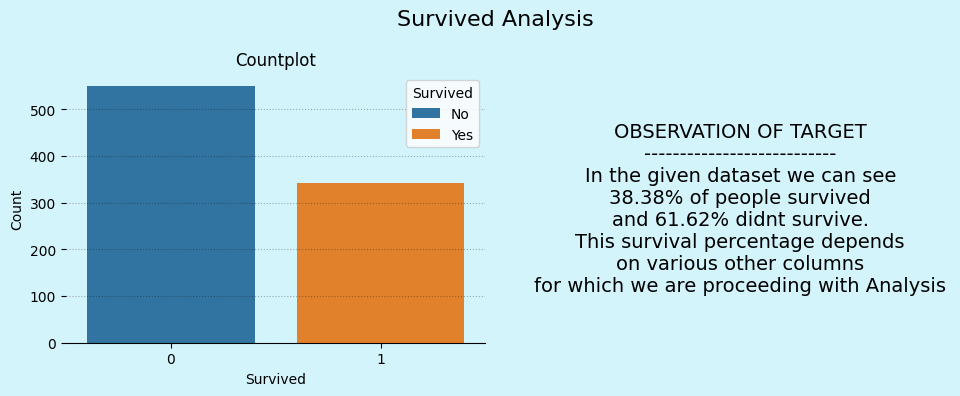

In [276]:
# Creating plot structure
fig = plt.figure(figsize=(10,4))
fig.suptitle('Survived Analysis',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#D3F4FB'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Countplot
viz = sns.countplot(x='Survived', data=data, hue='Survived',ax = sec_1)
viz.set_xlabel('Survived')
viz.set_ylabel('Count')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Update legend labels for hue
legend_labels = ['No','Yes']
legend = viz.legend(title='Survived', labels=legend_labels)

# Output
sur_percentage = np.round(data['Survived'].value_counts(normalize=True)*100,2)

sec_2.text(0.5,0.5,f"OBSERVATION OF TARGET\n---------------------------\nIn the given dataset we can see\n{sur_percentage[1]}% of people survived\nand {sur_percentage[0]}% didnt survive.\nThis survival percentage depends\non various other columns\nfor which we are proceeding with Analysis"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_1:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Passenger Class

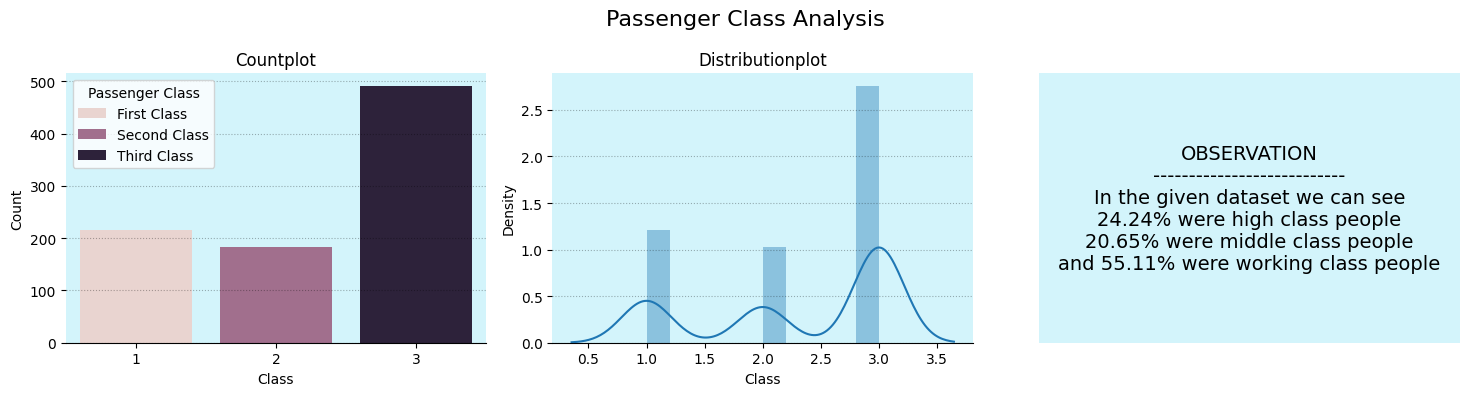

In [277]:
# Creating plot structure
fig = plt.figure(figsize=(15,4))
fig.suptitle('Passenger Class Analysis',fontsize=16)
spec = fig.add_gridspec(1,3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[0,2])

sections = [sec_1,sec_2,sec_3]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Countplot
viz = sns.countplot(x='PassengerClass',data=data,ax=sec_1,hue='PassengerClass')
viz.set_xlabel('Class')
viz.set_ylabel('Count')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Update legend labels for hue
legend_labels = ['First Class', 'Second Class', 'Third Class']
legend = viz.legend(title='Passenger Class', labels=legend_labels)

# Distplot
viz = sns.distplot(data['PassengerClass'], ax=sec_2)
viz.set_xlabel('Class')
viz.set_title('Distributionplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
pcls_percentage = np.round(data['PassengerClass'].value_counts(normalize=True)*100,2)

sec_3.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{pcls_percentage[1]}% were high class people\n{pcls_percentage[2]}% were middle class people\nand {pcls_percentage[3]}% were working class people"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_3.xaxis.set_visible(False)
sec_3.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection in (sec_1,sec_2):
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Gender

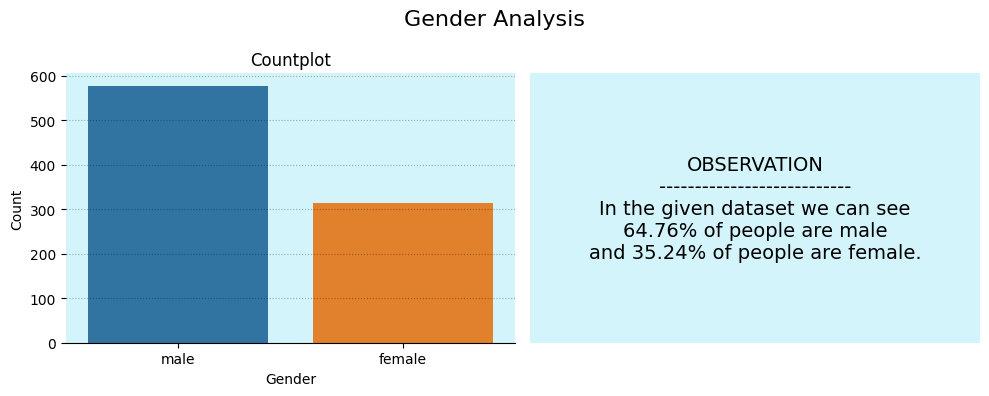

In [278]:
# Creating plot structure
fig = plt.figure(figsize=(10,4))
fig.suptitle('Gender Analysis',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#D3F4FB'
for selection in [sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Countplot
viz = sns.countplot(x='Sex', data=data, hue='Sex', ax = sec_1)
viz.set_xlabel('Gender')
viz.set_ylabel('Count')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
gen_percentage = np.round(data['Sex'].value_counts(normalize=True)*100,2)

sec_2.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{gen_percentage['male']}% of people are male\nand {gen_percentage['female']}% of people are female."
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_1:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Age and Age_Category

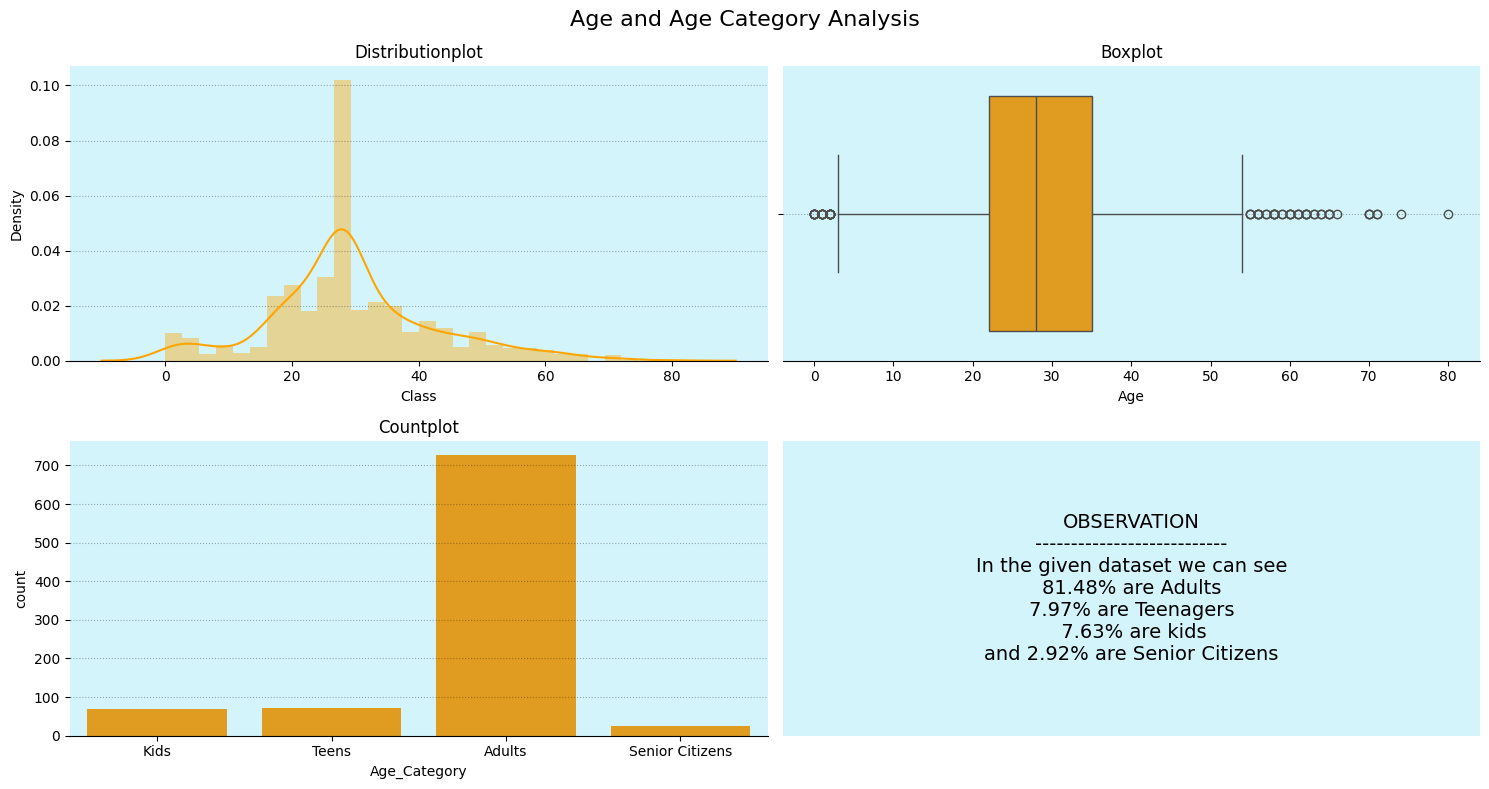

In [279]:
# Creating plot structure
fig = plt.figure(figsize=(15,8))
fig.suptitle('Age and Age Category Analysis',fontsize=16)
spec = fig.add_gridspec(2,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

sections = [sec_1,sec_2,sec_3,sec_4]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Distplot
viz = sns.distplot(data['Age'], ax=sec_1, color='orange')
viz.set_xlabel('Class')
viz.set_title('Distributionplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Boxplot
viz = sns.boxplot(x='Age',data=data,ax=sec_2, color='orange')
viz.set_xlabel('Age')
viz.set_title('Boxplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Countplot
viz = sns.countplot(x='Age_Category',data=data,ax=sec_3, color='orange')
viz.set_xlabel('Age_Category')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
age_percentage = np.round(data['Age_Category'].value_counts(normalize=True)*100,2)

sec_4.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{age_percentage['Adults']}% are Adults\n{age_percentage['Teens']}% are Teenagers\n {age_percentage['Kids']}% are kids\nand {age_percentage['Senior Citizens']}% are Senior Citizens"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection in (sec_1,sec_2,sec_3):
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Siblings or Spouses

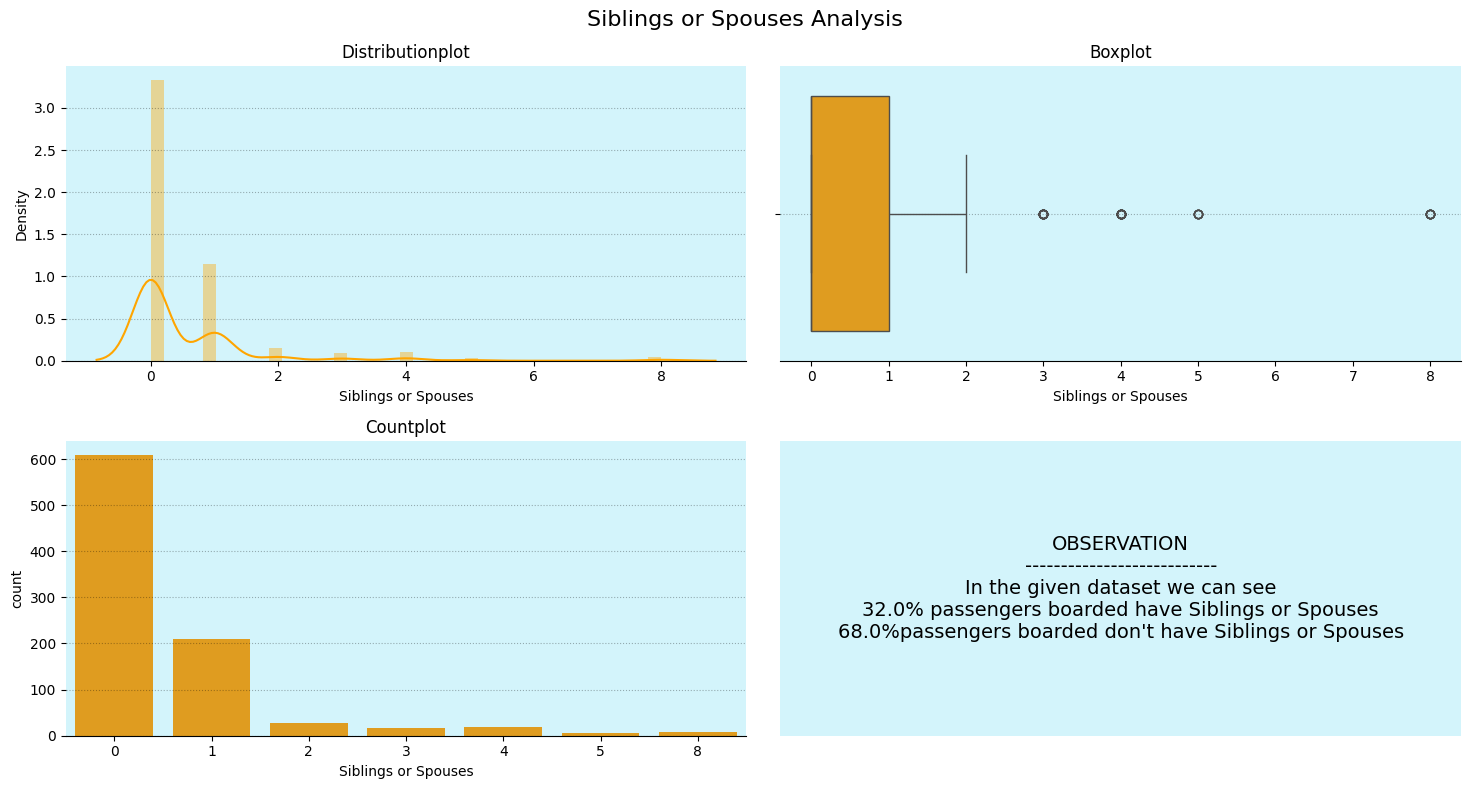

In [280]:
# Creating plot structure
fig = plt.figure(figsize=(15,8))
fig.suptitle('Siblings or Spouses Analysis',fontsize=16)
spec = fig.add_gridspec(2,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

sections = [sec_1,sec_2,sec_3,sec_4]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Distplot
viz = sns.distplot(data['Sibling/Spouse'], ax=sec_1, color='orange')
viz.set_xlabel('Siblings or Spouses')
viz.set_title('Distributionplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Boxplot
viz = sns.boxplot(x='Sibling/Spouse',data=data,ax=sec_2, color='orange')
viz.set_xlabel('Siblings or Spouses')
viz.set_title('Boxplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Countplot
viz = sns.countplot(x='Sibling/Spouse',data=data,ax=sec_3, color='orange')
viz.set_xlabel('Siblings or Spouses')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
With_SibSp_percentage = np.round(((data['Sibling/Spouse'] > 0).sum())/data.shape[0],2)*100
Without_SibSp_percentage = np.round(((data['Sibling/Spouse'] == 0).sum())/data.shape[0],2)*100

sec_4.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{With_SibSp_percentage}% passengers boarded have Siblings or Spouses\n{Without_SibSp_percentage}%passengers boarded don't have Siblings or Spouses"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection in (sec_1,sec_2,sec_3):
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Parents or Children

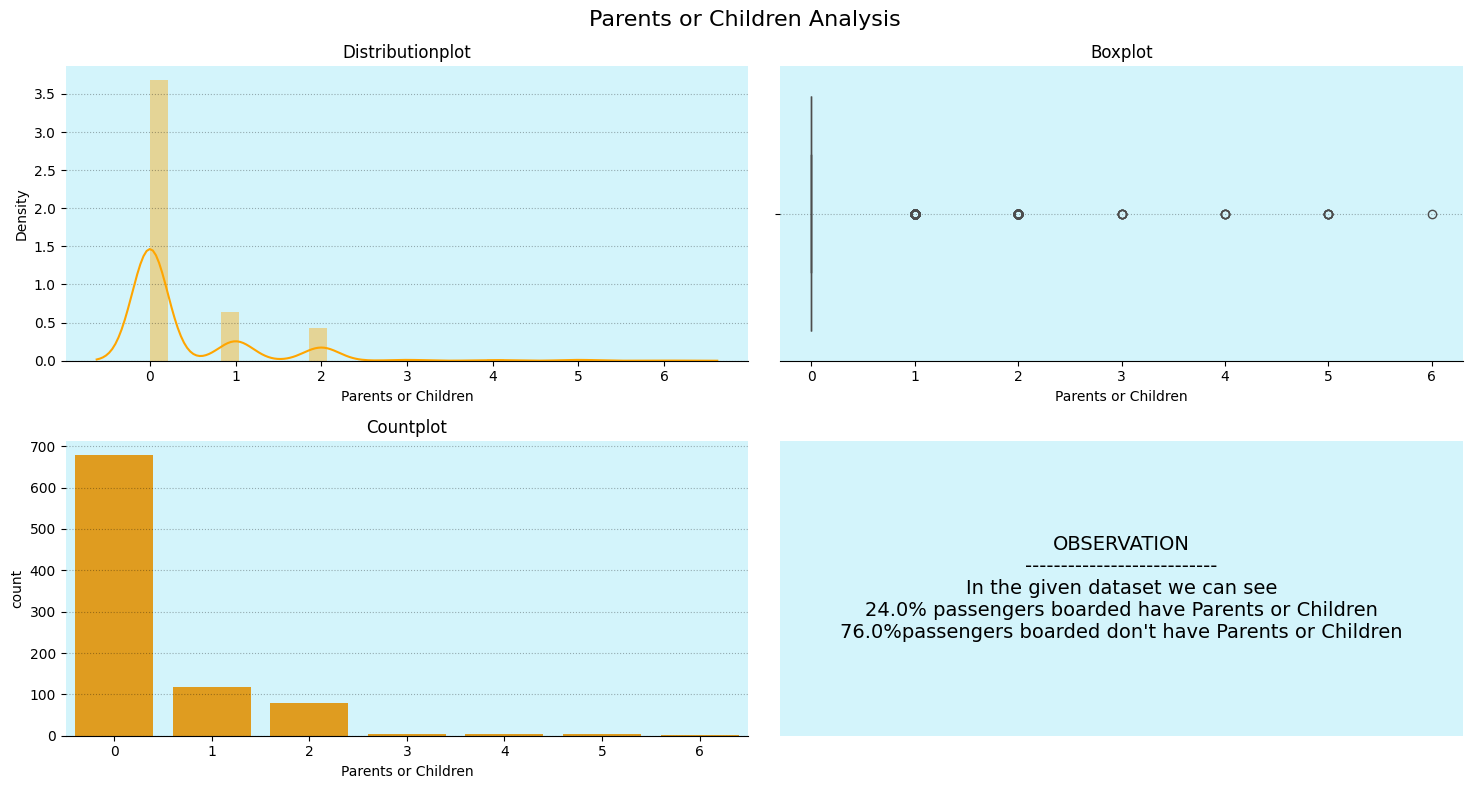

In [281]:
# Creating plot structure
fig = plt.figure(figsize=(15,8))
fig.suptitle('Parents or Children Analysis',fontsize=16)
spec = fig.add_gridspec(2,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

sections = [sec_1,sec_2,sec_3,sec_4]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Distplot
viz = sns.distplot(data['Parents/Children'], ax=sec_1, color='orange')
viz.set_xlabel('Parents or Children')
viz.set_title('Distributionplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Boxplot
viz = sns.boxplot(x='Parents/Children',data=data,ax=sec_2, color='orange')
viz.set_xlabel('Parents or Children')
viz.set_title('Boxplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Countplot
viz = sns.countplot(x='Parents/Children',data=data,ax=sec_3, color='orange')
viz.set_xlabel('Parents or Children')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
With_PaCh_percentage = np.round(((data['Parents/Children'] > 0).sum())/data.shape[0],2)*100
Without_PaCh_percentage = np.round(((data['Parents/Children'] == 0).sum())/data.shape[0],2)*100

sec_4.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{With_PaCh_percentage}% passengers boarded have Parents or Children\n{Without_PaCh_percentage}%passengers boarded don't have Parents or Children"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection in (sec_1,sec_2,sec_3):
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Fare

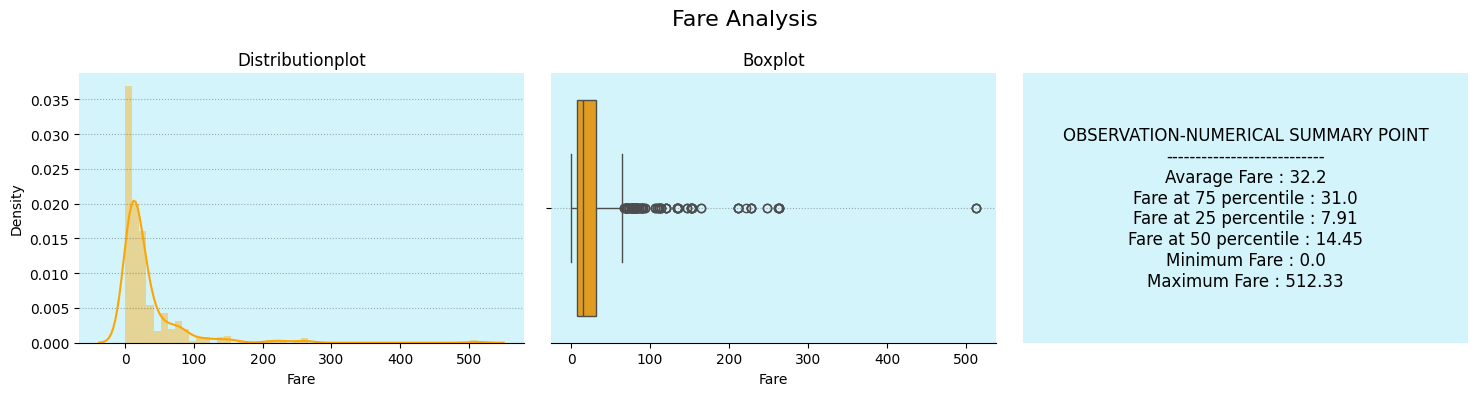

In [282]:
# Creating plot structure
fig = plt.figure(figsize=(15,4))
fig.suptitle('Fare Analysis',fontsize=16)
spec = fig.add_gridspec(1,3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[0,2])

sections = [sec_1,sec_2,sec_3]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Distplot
viz = sns.distplot(data['Fare'],ax=sec_1,color='orange')
viz.set_xlabel('Fare')
viz.set_title('Distributionplot')
viz.grid(axis='y', linestyle=':', color='black',alpha=0.3)

# Boxplot
viz = sns.boxplot(x='Fare',data=data,ax=sec_2, color='orange')
viz.set_xlabel('Fare')
viz.set_title('Boxplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
AverageFare = np.round(data['Fare'].mean(),2)
Quantile_75 = np.round(data['Fare'].quantile(0.75),2)
Quantile_25 = np.round(data['Fare'].quantile(0.25),2)
Quantile_50 = np.round(data['Fare'].quantile(0.50),2)
MinimumFare = np.round(data['Fare'].min(),2)
MaximumFare = np.round(data['Fare'].max(),2)

sec_3.text(0.5,0.5,f"OBSERVATION-NUMERICAL SUMMARY POINT\n---------------------------\nAvarage Fare : {AverageFare}\nFare at 75 percentile : {Quantile_75}\nFare at 25 percentile : {Quantile_25}\nFare at 50 percentile : {Quantile_50}\nMinimum Fare : {MinimumFare}\nMaximum Fare : {MaximumFare}"
,ha='center',va='center',size=12)

# Removing axis and grid lines
sec_3.xaxis.set_visible(False)
sec_3.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection in (sec_1,sec_2):
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Embarked

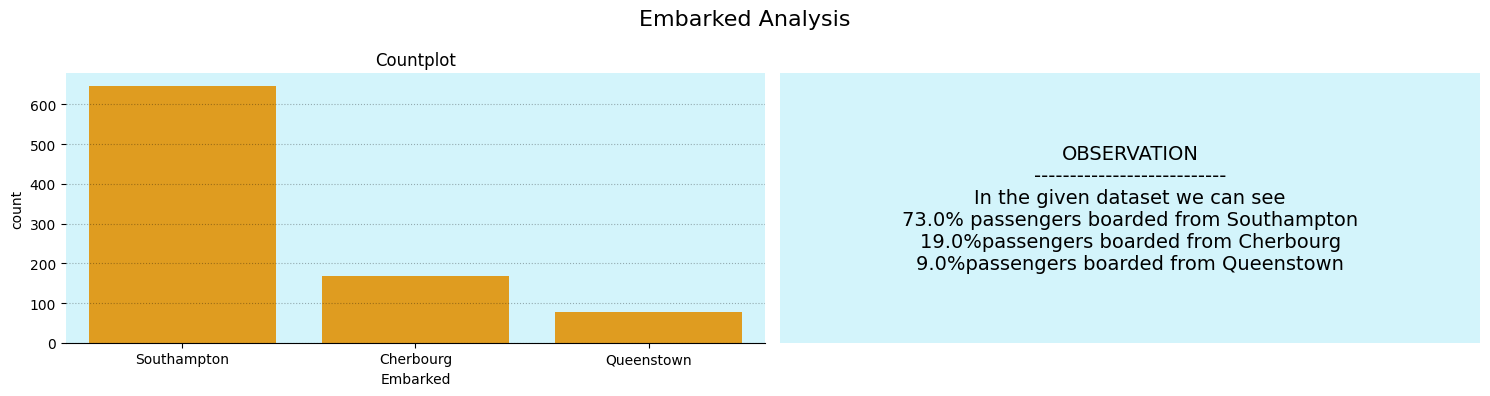

In [283]:
# Creating plot structure
fig = plt.figure(figsize=(15,4))
fig.suptitle('Embarked Analysis',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

sections = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in sections:
  selection.set_facecolor(bg_color)

# Countplot
viz = sns.countplot(x='Embarked',data=data,ax=sec_1, color='orange')
viz.set_xlabel('Embarked')
viz.set_title('Countplot')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)

# Output
S_percentage = np.round(((data['Embarked'] == 'Southampton').sum())/data.shape[0],2)*100
C_percentage = np.round(((data['Embarked'] == 'Cherbourg').sum())/data.shape[0],2)*100
Q_percentage = np.round(((data['Embarked'] == 'Queenstown').sum())/data.shape[0],2)*100

sec_2.text(0.5,0.5,f"OBSERVATION\n---------------------------\nIn the given dataset we can see\n{S_percentage}% passengers boarded from Southampton\n{C_percentage}%passengers boarded from Cherbourg\n{Q_percentage}%passengers boarded from Queenstown"
,ha='center',va='center',size=14)

# Removing axis and grid lines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing the border lines
for position in ['left', 'right', 'top', 'bottom']:
    for selection in sections:
        if position == 'bottom' and selection == sec_1:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

### Observation - Univariate Analysis

* Survival rate is 23.24% less than the death rate
* There were 10.22% more working class people compared to high class and middle class combined
* 29.52% more Male passengers were aboard compared to Female passangers
* We had majority of Adults whose age lied between 20 to 60 were aboard in the ship
* 32% passengers boarded the ship along with their Siblings or Spouses, whereas 24% passengers boarded the ship along with their Parents or Childrens
* The range of Fare varied greately as the minimul fare amount was 0 whereas the maximum fare amount was 512.33
* There are outliers in Age and Fare which are yet to be treated
* Embark percentage in Southampton is high as the ship started its journey from there, hence many people boarded the ship from ther

### Bivariate Analysis

#### Survived vs Passanger Class

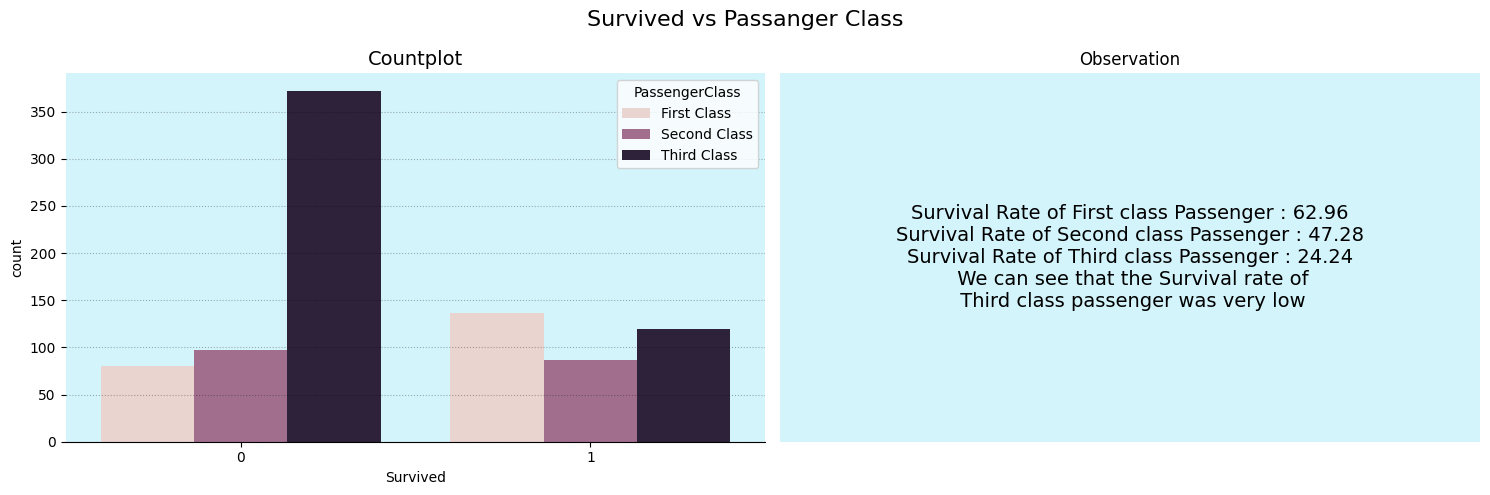

In [284]:
# Survived vs Passanger Class
fig = plt.figure(figsize=(15,5))
fig.suptitle('Survived vs Passanger Class',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])

section = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Countplot
ax = sns.countplot(x=data['Survived'],
              hue = data['PassengerClass'],ax=sec_1)

# Update legend labels for hue
legend_labels = ['First Class','Second Class','Third Class']
legend = ax.legend(title='PassengerClass', labels=legend_labels)

# Naming the axis and title
ax.set_title('Countplot',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Output
# Calculate survival rate % based on Passenger Class
survival_rate_by_class = np.round(data.groupby('PassengerClass')['Survived'].mean() * 100,2)

sec_2.set_title('Observation')
sec_2.text(0.5,0.5,f"Survival Rate of First class Passenger : {survival_rate_by_class[1]}\nSurvival Rate of Second class Passenger : {survival_rate_by_class[2]}\nSurvival Rate of Third class Passenger : {survival_rate_by_class[3]}\n We can see that the Survival rate of\n Third class passenger was very low"
,ha='center',va='center',size=14)

# Remove axis in the grid
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing border lines
for position in ['left','bottom','right','top']:
  for selection in section:
    if position == 'bottom' and selection == sec_1:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Survived vs Gender based on Age_Category

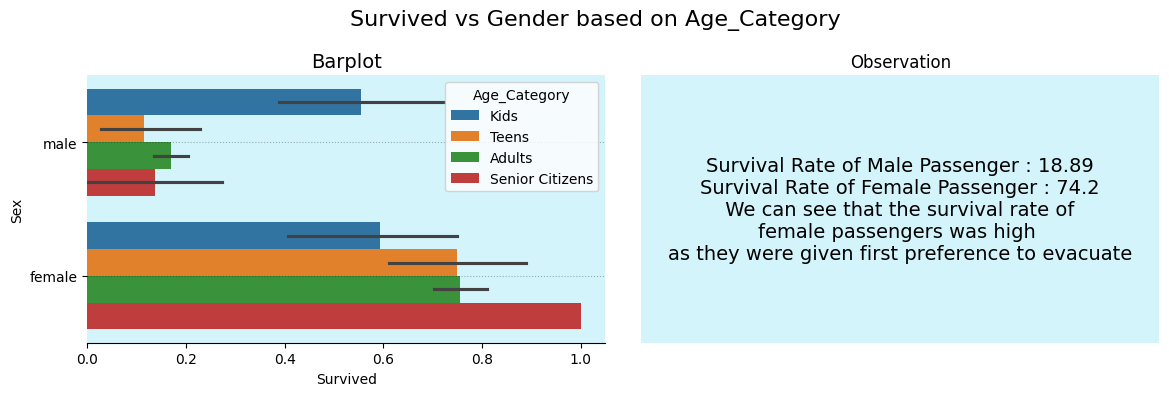

In [285]:
# Survived vs Gender based on Age_Category
fig = plt.figure(figsize=(12,4))
fig.suptitle('Survived vs Gender based on Age_Category',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])

section = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Barplot
ax = sns.barplot(x=data['Survived'],y=data['Sex'],
              hue = data['Age_Category'],ax=sec_1,orient='h')

# Naming the axis and title
ax.set_title('Barplot',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Output
# Calculate survival rate % based on Gender
survival_rate_by_sex = np.round(data.groupby('Sex')['Survived'].mean() * 100,2)

sec_2.set_title('Observation')
sec_2.text(0.5,0.5,f"Survival Rate of Male Passenger : {survival_rate_by_sex['male']}\nSurvival Rate of Female Passenger : {survival_rate_by_sex['female']}\n We can see that the survival rate of \nfemale passengers was high \nas they were given first preference to evacuate"
,ha='center',va='center',size=14)

# Remove axis in the grid
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing border lines
for position in ['left','bottom','right','top']:
  for selection in section:
    if position == 'bottom' and selection == sec_1:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Survived vs Age

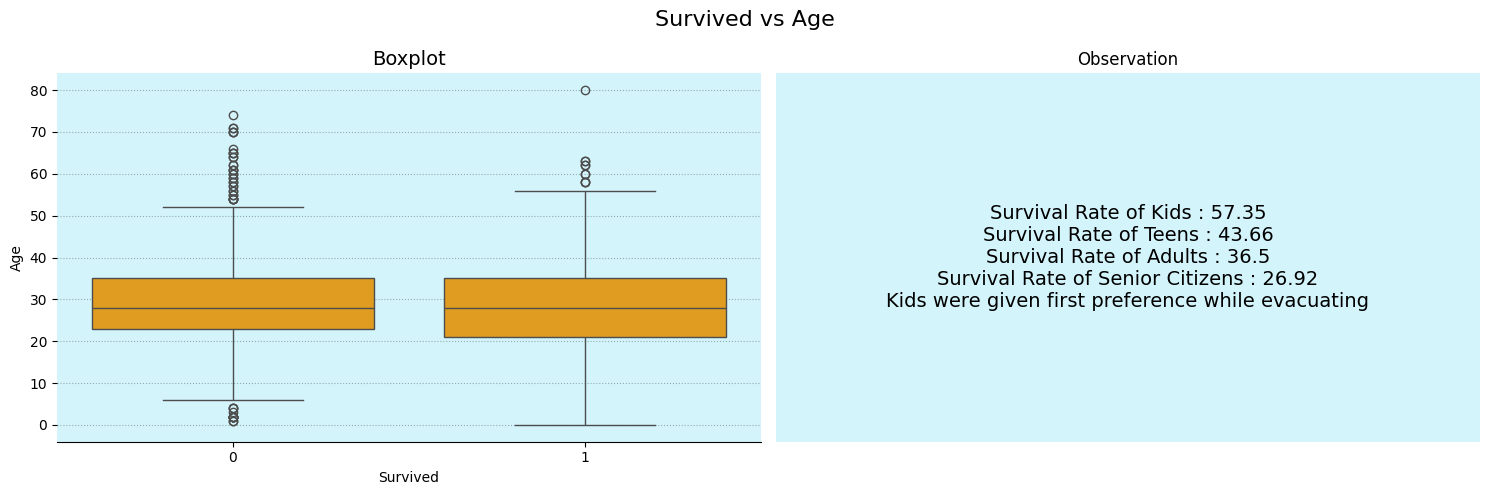

In [286]:
# Survived vs Age
fig = plt.figure(figsize=(15,5))
fig.suptitle('Survived vs Age',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])

section = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Boxplot
ax = sns.boxplot(x='Survived',y = 'Age',data=data,ax=sec_1,color='orange')

# Naming the axis and title
ax.set_title('Boxplot',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Output
# Calculate survival rate % based on Age Category
survival_rate_by_agecategory = np.round(data.groupby('Age_Category')['Survived'].mean() * 100,2)

sec_2.set_title('Observation')
sec_2.text(0.5,0.5,f"Survival Rate of Kids : {survival_rate_by_agecategory['Kids']}\nSurvival Rate of Teens : {survival_rate_by_agecategory['Teens']}\nSurvival Rate of Adults : {survival_rate_by_agecategory['Adults']}\nSurvival Rate of Senior Citizens : {survival_rate_by_agecategory['Senior Citizens']}\nKids were given first preference while evacuating"
,ha='center',va='center',size=14)

# Remove axis in the grid
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing border lines
for position in ['left','bottom','right','top']:
  for selection in section:
    if position == 'bottom' and selection == sec_1:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Survived Vs Relationship

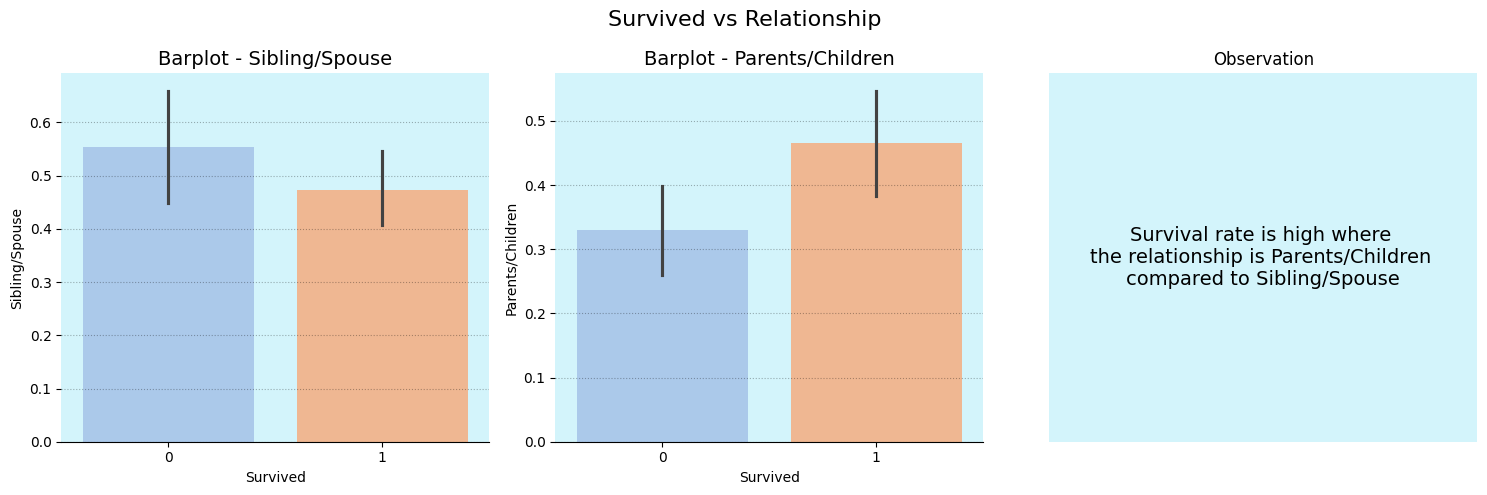

In [304]:
# Survived vs Relationship
fig = plt.figure(figsize=(15,5))
fig.suptitle('Survived vs Relationship',fontsize=16)
spec = fig.add_gridspec(1,3)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])
sec_3 = fig.add_subplot(spec[2])

section = [sec_1,sec_2,sec_3]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Barplot
ax = sns.barplot(x='Survived',y = 'Sibling/Spouse',data=data,ax=sec_1,palette='pastel')

# Naming the axis and title
ax.set_title('Barplot - Sibling/Spouse',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Barplot
ax = sns.barplot(x='Survived',y = 'Parents/Children',data=data,ax=sec_2,palette='pastel')

# Naming the axis and title
ax.set_title('Barplot - Parents/Children',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Output
sec_3.set_title('Observation')
sec_3.text(0.5,0.5,f"Survival rate is high where \nthe relationship is Parents/Children \ncompared to Sibling/Spouse"
,ha='center',va='center',size=14)

# Remove axis in the grid
sec_3.xaxis.set_visible(False)
sec_3.yaxis.set_visible(False)

# Removing border lines
for position in ['left','bottom','right','top']:
  for selection in section:
    if position == 'bottom' and selection in (sec_1,sec_2):
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Survived vs Fare based on Passengers Class

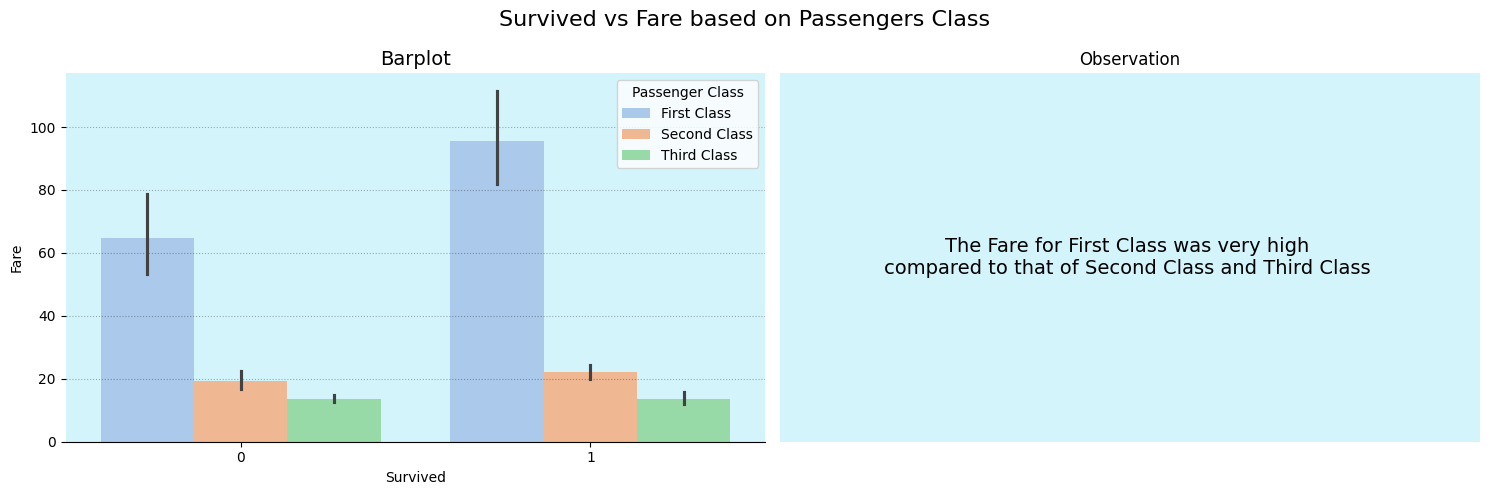

In [287]:
# Survived vs Fare based on Passengers Class
fig = plt.figure(figsize=(15,5))
fig.suptitle('Survived vs Fare based on Passengers Class',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])

section = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Barplot
ax = sns.barplot(x='Survived',y = 'Fare',hue='PassengerClass',data=data,ax=sec_1,palette='pastel')

# Naming the axis and title
ax.set_title('Barplot',fontsize=14,color='black')
ax.grid(axis='y',linestyle=':',color='black',alpha=0.3)

# Update legend name
legend_labels = {'1': 'First Class', '2': 'Second Class', '3': 'Third Class'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[label.get_text()] for label in ax.get_legend().get_texts()],title='Passenger Class')

# Output
sec_2.set_title('Observation')
sec_2.text(0.5,0.5,f"The Fare for First Class was very high \ncompared to that of Second Class and Third Class "
,ha='center',va='center',size=14)

# Remove axis in the grid
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

# Removing border lines
for position in ['left','bottom','right','top']:
  for selection in section:
    if position == 'bottom' and selection == sec_1:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

plt.tight_layout()
plt.show()

#### Survived vs Embarked

Survived       0    1
Embarked             
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219


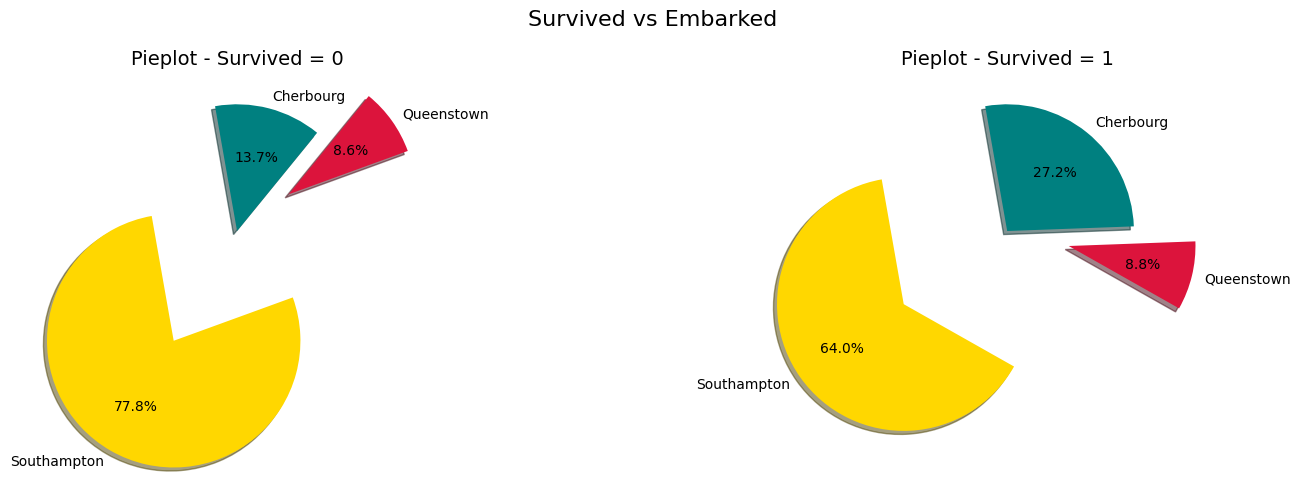

In [338]:
# Survived vs Embarked
fig = plt.figure(figsize=(15,5))
fig.suptitle('Survived vs Embarked',fontsize=16)
spec = fig.add_gridspec(1,2)
sec_1 = fig.add_subplot(spec[0])
sec_2 = fig.add_subplot(spec[1])

section = [sec_1,sec_2]

# Adding color preference
bg_color = '#D3F4FB'
for selection in section:
  selection.set_facecolor(bg_color)

# Calculate survival proportions based on 'Embarked'
survival_counts = data.groupby(['Embarked', 'Survived']).size().unstack()
embarked_labels = survival_counts.index.tolist()

print(survival_counts)

# Pieplot
sec_1.pie(survival_counts[0],labels=embarked_labels,autopct='%0.1f%%',colors=['teal','crimson','gold'],shadow=True,startangle=100,counterclock=False
          ,explode=[0,0.5,1])

# Naming the axis and title
sec_1.set_title('Pieplot - Survived = 0',fontsize=14,color='black')

# Pieplot
sec_2.pie(survival_counts[1],labels=embarked_labels,autopct='%0.1f%%',colors=['teal','crimson','gold'],shadow=True,startangle=100,counterclock=False
          ,explode=[0,0.5,1])

# Naming the axis and title
sec_2.set_title('Pieplot - Survived = 1',fontsize=14,color='black')

plt.tight_layout()
plt.show()

### Observation - Bivariate Analysis

* Survival rate of First Class Passenger is 15.68% more than Second Class Passenger and 38.72% more than that of Third Class. So during wreckage, Third class people have very less Survival rate
* Survival rate of Female and Kids Passenger is high compared to others as they were evacuated first during the wreckage
* First Class Passengers paid huge Fare to be on aboard compared to the remaining class passengers
* Relationship and Embark doesn't play much role in the Survival rate

### Multivariate Analysis

#### Encoding

In [384]:
# Creating a copy to modify for multivariate analysis
mult_data = data

# List of column names, its data type and its missing percentage
column_names = mult_data.columns.tolist()
column_dtypes = [str(dtype) for dtype in mult_data.dtypes.tolist()]
column_unique = [len(mult_data[name].unique()) for name in mult_data.columns]
column_mv = [mult_data[name].isnull().mean()*100 for name in mult_data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.0
2,PassengerClass,int64,3,0.0
3,Sex,object,2,0.0
4,Age,int64,71,0.0
5,Sibling/Spouse,int64,7,0.0
6,Parents/Children,int64,7,0.0
7,Fare,float64,248,0.0
8,Embarked,object,3,0.0
9,Age_Category,category,4,0.0


In [385]:
# For correlation we have to Convert all the categorical columns to numerical columns
# Encoding
gender_dummies = pd.get_dummies(data['Sex'],prefix='Gender')
embark_dummies = pd.get_dummies(data['Embarked'],prefix='Embarked')
category_dummies = pd.get_dummies(data['Age_Category'],prefix='AgeCategory')
mult_data = pd.concat([mult_data,gender_dummies,embark_dummies,category_dummies],axis=1)

mult_data[gender_dummies.columns] = mult_data[gender_dummies.columns].astype(int)
mult_data[embark_dummies.columns] = mult_data[embark_dummies.columns].astype(int)
mult_data[category_dummies.columns] = mult_data[category_dummies.columns].astype(int)

# Remove object columns
for col in ['Sex','Embarked','Age_Category']:
  mult_data.drop(columns=col,inplace=True)

mult_data.head()

,Survived,PassengerClass,Age,Sibling/Spouse,Parents/Children,Fare,Gender_female,Gender_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,AgeCategory_Kids,AgeCategory_Teens,AgeCategory_Adults,AgeCategory_Senior Citizens
0,0,3,22,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,1,1,38,1,0,71.2833,1,0,1,0,0,0,0,1,0
2,1,3,26,0,0,7.9250,1,0,0,0,1,0,0,1,0
3,1,1,35,1,0,53.1000,1,0,0,0,1,0,0,1,0
4,0,3,35,0,0,8.0500,0,1,0,0,1,0,0,1,0


#### Dataframe information post Encoding

In [386]:
# List of column names, its data type and its missing percentage
column_names = mult_data.columns.tolist()
column_dtypes = [str(dtype) for dtype in mult_data.dtypes.tolist()]
column_unique = [len(mult_data[name].unique()) for name in mult_data.columns]
column_mv = [mult_data[name].isnull().mean()*100 for name in mult_data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.0
2,PassengerClass,int64,3,0.0
3,Age,int64,71,0.0
4,Sibling/Spouse,int64,7,0.0
5,Parents/Children,int64,7,0.0
6,Fare,float64,248,0.0
7,Gender_female,int64,2,0.0
8,Gender_male,int64,2,0.0
9,Embarked_Cherbourg,int64,2,0.0
10,Embarked_Queenstown,int64,2,0.0


#### Heatmap

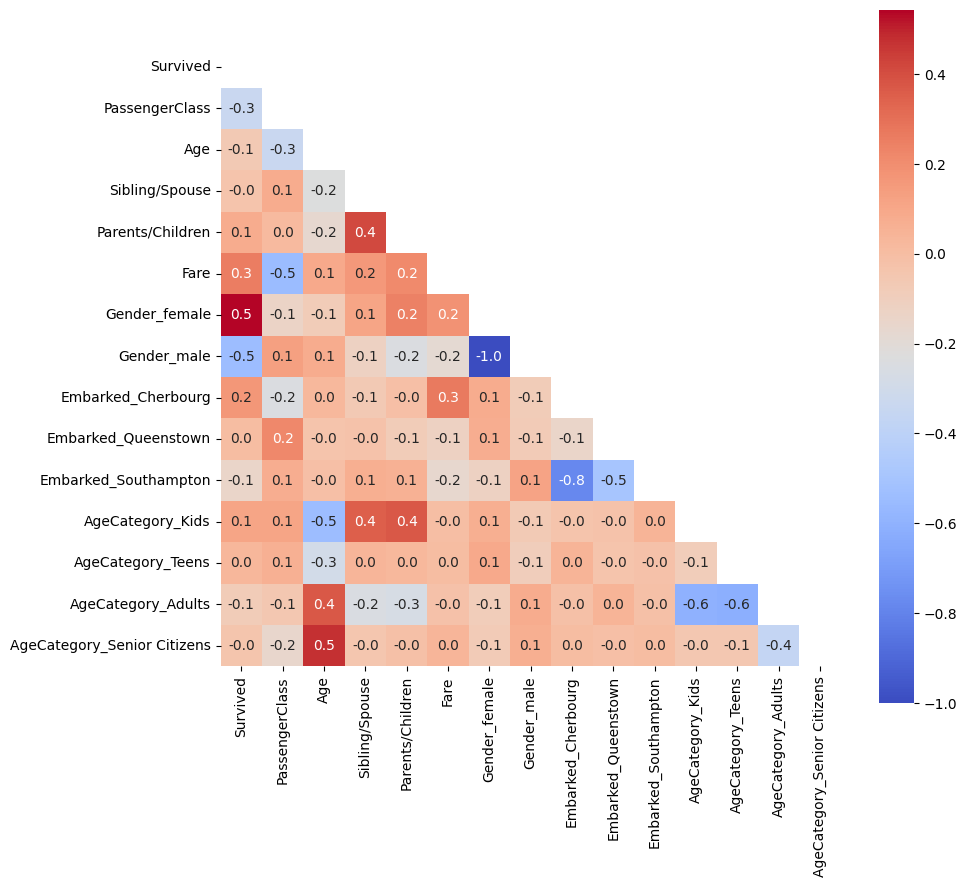

In [390]:
# Creating a correlation heatmap
plt.figure(figsize=(10,9))
correlation = mult_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', mask=mask, square=True, cmap='coolwarm')
plt.show()

## Final Observation on Survival column behavior

* Gender played a major role in a passengers survival rate, as Female Passengers Survival rate is more compared to Male Passengers
* Passengers Class also played a major role in a passengers survival rate, as Third class passengers have a very low Survival rate compared to others
* Kids and Senior Citizens were rescued first which is based on the Age
* Embarked, Sibling/Spouse and Parents/Children - These columns didnt have impact much on the survival rate
* Since Fare is directly proportional to the Passengers Class, the behaviour of the survival rate with respect to Fare is same as that of Passangers Class